## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the Data

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


# Clustering with geographical

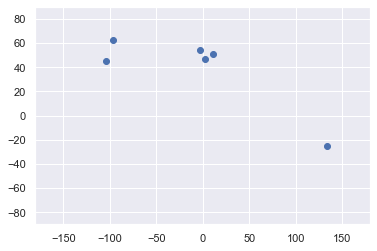

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [4]:
x = data.iloc[:,1:3]
x.head()

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40


In [5]:
kmeans = KMeans(3)

In [6]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


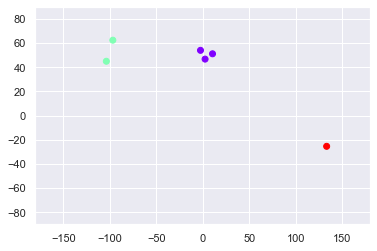

In [9]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Clustering categorical Data (Language)

In [10]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [11]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [12]:
kmeans = KMeans(3)

In [13]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [15]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


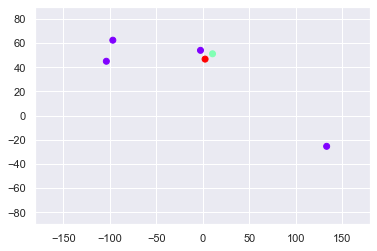

In [16]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Choosing number of clusters (WCSS - Elbow Method)

In [19]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

c:\users\zol60\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\zol60\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\zol60\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


[3.5, 0.5, 0.0, 0.0, 0.0, 0.0]

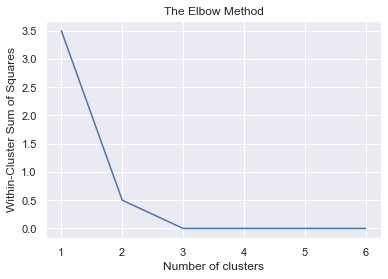

In [20]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()